In [285]:
import glob

csvfiles = glob.glob('*.csv')
csvfiles.sort()
csvfiles

['rummy.mcts1-0 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-0 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-0 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).13.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).13.card.2.joker.csv']

In [286]:
import pandas as pd
heatmap_dict = {}
for csv in csvfiles:
    result = pd.read_csv(csv)
    result.head()
    players = [csv.split('.')[i] for i in [1,3]]
    wins = result['winner'].value_counts().to_dict()
    median_gain = (result['score2']-result['score1']).median()
    mean_gain = (result['score2']-result['score1']).mean()
    print(f"{players[0]:<35} : {round(wins.get(0,0)*100/len(result),1):>5}% vs. {players[1]:<35} : {round(wins.get(1,0)*100/len(result),1):>5}% No. games {len(result)}")
    if players[1] in heatmap_dict.keys():
        heatmap_dict[players[1]][players[0]] = (wins.get(0,0)*100/len(result),median_gain,mean_gain)
    else:
        heatmap_dict[players[1]]={players[0]:(wins.get(0,0)*100/len(result),median_gain,mean_gain)}

mcts1-0 (MCTS-minscore)             :  53.8% vs. mcts2-0 (MCTS-minscore)             :  46.2% No. games 1000
mcts1-0 (MCTS-minscore)             :  46.6% vs. mcts2-25 (MCTS-minscore)            :  53.4% No. games 1000
mcts1-0 (MCTS-minscore)             :  32.6% vs. mcts2-50 (MCTS-minscore)            :  67.4% No. games 500
mcts1-25 (MCTS-minscore)            :  62.8% vs. mcts2-0 (MCTS-minscore)             :  37.2% No. games 500
mcts1-25 (MCTS-minscore)            :  51.3% vs. mcts2-25 (MCTS-minscore)            :  48.7% No. games 817
mcts1-25 (MCTS-minscore)            :  50.7% vs. mcts2-50 (MCTS-minscore)            :  49.3% No. games 1000
mcts1-50 (MCTS-minscore)            :  61.8% vs. mcts2-0 (MCTS-minscore)             :  38.2% No. games 500
mcts1-50 (MCTS-minscore)            :  55.1% vs. mcts2-25 (MCTS-minscore)            :  44.9% No. games 750
mcts1-50 (MCTS-minscore)            :  55.4% vs. mcts2-50 (MCTS-minscore)            :  44.6% No. games 511


In [287]:
heatmap_dict

{'mcts2-0 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (53.8,
   np.float64(2.0),
   np.float64(2.547)),
  'mcts1-25 (MCTS-minscore)': (62.8, np.float64(17.0), np.float64(13.97)),
  'mcts1-50 (MCTS-minscore)': (61.8, np.float64(13.0), np.float64(12.024))},
 'mcts2-25 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (46.6,
   np.float64(-2.0),
   np.float64(-2.346)),
  'mcts1-25 (MCTS-minscore)': (51.28518971848225,
   np.float64(2.0),
   np.float64(1.6523867809057529)),
  'mcts1-50 (MCTS-minscore)': (55.06666666666667,
   np.float64(6.5),
   np.float64(5.612))},
 'mcts2-50 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (32.6,
   np.float64(-20.0),
   np.float64(-16.034)),
  'mcts1-25 (MCTS-minscore)': (50.7, np.float64(2.0), np.float64(1.757)),
  'mcts1-50 (MCTS-minscore)': (55.38160469667319,
   np.float64(7.0),
   np.float64(7.569471624266145))}}

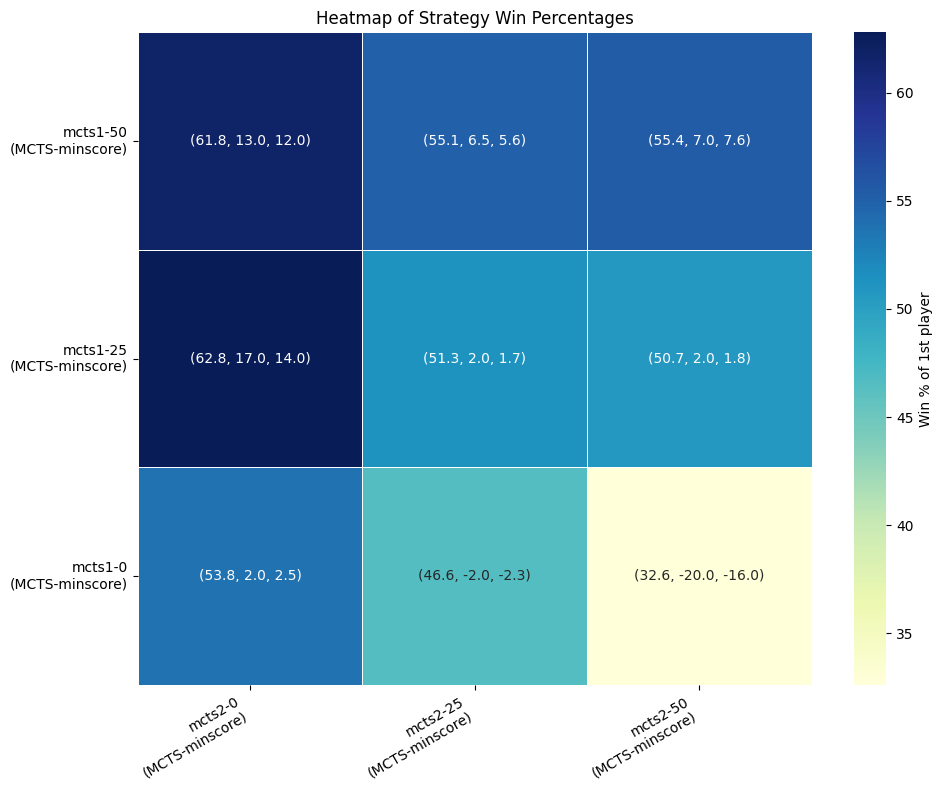

In [288]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract first values for color
heat_values = pd.DataFrame({col: {row: val[0] for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Extract full tuples for annotations
annotations = pd.DataFrame({col: {row: f"({val[0]:.1f}, {val[1]:.1f}, {val[2]:.1f})" for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Optional: wrap labels to prevent overlap
def wrap(label):
    return label.replace(" (", "\n(")

heat_values.index = [wrap(idx) for idx in heat_values.index]
heat_values.columns = [wrap(col) for col in heat_values.columns]
annotations.index = heat_values.index
annotations.columns = heat_values.columns
heat_values = heat_values.iloc[::-1]
annotations = annotations.iloc[::-1]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heat_values, annot=annotations, fmt="", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Win % of 1st player"})

plt.title("Heatmap of Strategy Win Percentages")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()